# La Liga Investment Analysis
Uses Random Forest machine learning to identify top investment opportunities based on team performance, squad quality, and financial metrics.

**Data Sources:**
- `performance_metrics.csv` - Team performance statistics
- `squad_value_scores.csv` - Squad quality and value metrics
- `financial_scores.csv` - Financial performance scores

**Simple Target Score:**
- Target Score = (Win Rate × 50) + (Points Per Game × 30) + (Goal Difference × 0.2)
- Emphasizes winning consistency and point accumulation

## Model Configuration
- **Trees:** 400 estimators
- **Max Depth:** 12
- **Random State:** 42 

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [46]:
performance = pd.read_csv("../CleanedDatasets/Analysis/performance_metrics.csv")
squad = pd.read_csv("../CleanedDatasets/SquadAnalysis/squad_value_scores.csv")
financial = pd.read_csv("../CleanedDatasets/Financial/financial_scores.csv")

In [47]:
# Merge all datasets
data = performance.merge(squad, on="Team", how="left").merge(financial, on="Team", how="left")
data = data.fillna(0)

# Calculate simple target score: WinRate (50%) + PointsPerGame (30%) + GoalDifference (20%)
data["TargetScore"] = (
    data["WinRate"] * 50 +
    data["PointsPerGame"] * 30 +
    data["GoalDifference"] * 0.2
)

data

,Team,TotalMatches,Wins,Draws,Losses,WinRate,DrawRate,LossRate,TotalGoalsFor,TotalGoalsAgainst,...,MinAttendance,MatchesWithAttendance,AwayAttendance,HomeAttendance,EstimatedMatchdayRevenue,AttendancePerMatch,AttendanceScore,RevenueScore,FinancialScore,TargetScore
0,Athletic Club,238,94,73,71,0.394958,0.306723,0.298319,301,235,...,3518.0,355.0,27954.245810,42407.011364,3.336358e+07,35119.560563,38.380588,38.380588,76.761177,77.695798
1,Celta Vigo,238,71,72,95,0.298319,0.302521,0.399160,294,329,...,1738.0,355.0,27955.435028,16459.073034,2.108151e+07,22191.061972,24.251614,24.251614,48.503227,43.840336
2,Valencia,238,72,74,92,0.302521,0.310924,0.386555,280,319,...,2689.0,354.0,27346.360000,38402.134078,3.128987e+07,32936.709040,35.995048,35.995048,71.990096,43.880672
3,Mallorca,200,56,51,93,0.280000,0.255000,0.465000,192,274,...,2896.0,353.0,27068.637931,15786.385475,2.028023e+07,21347.609065,23.329842,23.329842,46.659684,30.450000
4,Leganés,76,17,25,34,0.223684,0.328947,0.447368,69,107,...,13.0,118.0,28557.758621,10663.983333,1.848627e+07,19459.228814,21.266116,21.266116,42.532232,33.584211
5,Villarreal,238,108,60,70,0.453782,0.252101,0.294118,399,296,...,4800.0,354.0,27812.949153,16549.689266,2.107225e+07,22181.319209,24.240966,24.240966,48.481933,91.692437
6,Alavés,200,52,52,96,0.260000,0.260000,0.480000,184,284,...,2896.0,277.0,25974.223022,15361.028986,1.965244e+07,20686.783394,22.607655,22.607655,45.215311,24.200000
7,Espanol,162,39,47,76,0.240741,0.290123,0.469136,173,242,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.607407
8,Real Betis,238,97,69,72,0.407563,0.289916,0.302521,326,298,...,1738.0,355.0,27786.491525,48665.567416,3.634266e+07,38255.436620,41.807646,41.807646,83.615293,71.356303
9,Atletico Madrid,238,139,58,41,0.584034,0.243697,0.172269,409,211,...,5401.0,353.0,28782.775862,56213.212291,4.055765e+07,42692.260623,46.656452,46.656452,93.312904,128.675630


In [48]:
imp_cols = ["WinRate","PointsPerGame","GoalDifference","AvgLeaguePosition","AvgAge_x","SquadValueScore","AvgAttendance"]
X = data[imp_cols]
y = data["TargetScore"]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
model = RandomForestRegressor(
    n_estimators=400,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,400
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
predictions = model.predict(X_test)

print("R² Score:", r2_score(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))


R² Score: 0.959132072961139
Mean Absolute Error: 5.455830523809684


In [52]:
data["MLScore"] = model.predict(X)
ml_score = data.sort_values("MLScore", ascending=False).reset_index()
ml_score[["Team", "MLScore"]].head(10)


,Team,MLScore
0,Barcelona,148.429059
1,Real Madrid,147.203265
2,Atletico Madrid,137.978610
3,Villarreal,85.108892
4,Real Betis,79.825760
5,Athletic Club,77.414263
6,Real Sociedad,74.748176
7,Sevilla,73.856930
8,Girona,60.432326
9,Osasuna,48.533955


C:\Users\divya\AppData\Local\Temp\ipykernel_10420\3152137927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


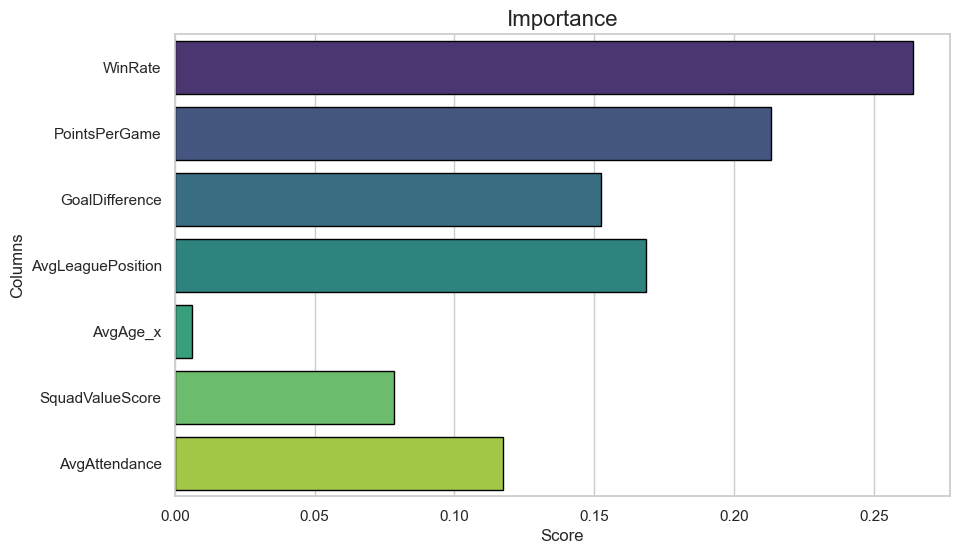

In [53]:
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances,
    y=imp_cols,
    palette="viridis",
    edgecolor="black"
 )
plt.title("Importance", fontsize=16)
plt.xlabel("Score")
plt.ylabel("Columns")
plt.savefig("../Outputs/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()


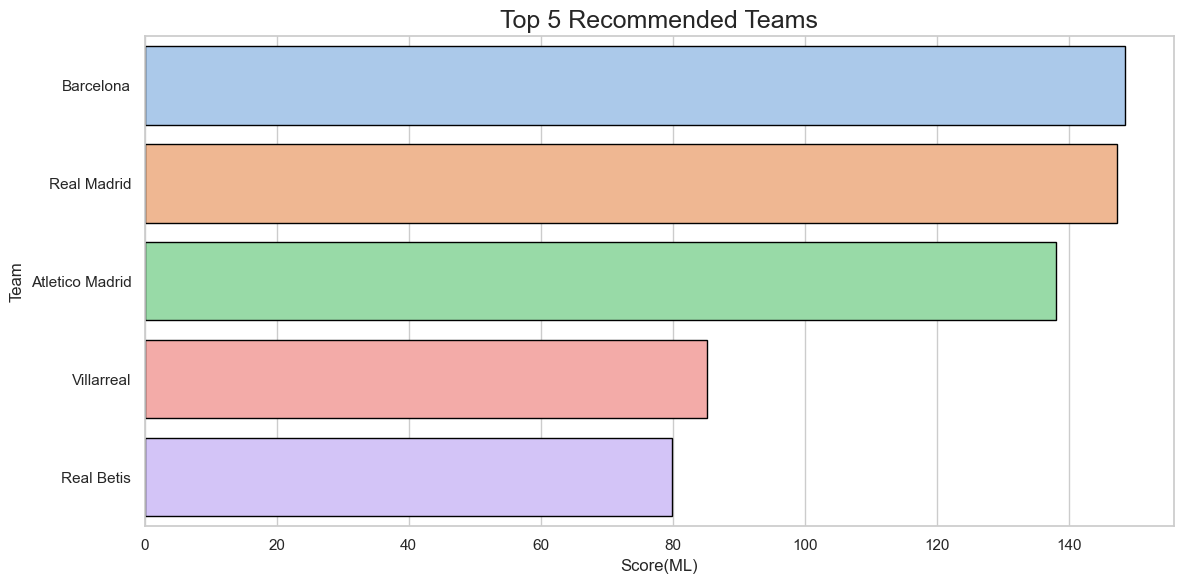

In [54]:
top5 = ml_score.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top5,
    x="MLScore",
    y="Team",
    hue="Team",
    palette="pastel",
    edgecolor="black",
 )
plt.title("Top 5 Recommended Teams", fontsize=18)
plt.xlabel("Score(ML)")
plt.ylabel("Team")
plt.tight_layout()
plt.savefig("../Outputs/top5_ml_recommendations.png", dpi=300, bbox_inches="tight")
plt.show()


## Investment Recommendations

- **Barcelona** leads with the highest ML score, combining the best attacking output (2.18 goals/match), youngest squad (23.64 years), and massive fan support for both immediate performance and long-term growth potential. 
- **Real Madrid** follows closely with exceptional consistency in winning (69.3%), strong squad quality, and the most stable performance across all metrics. 
- **Atlético Madrid** rounds out the top three with solid defensive foundations and balanced financial management.